In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1
5,5,F,N,Delhi,Very Hot,Masters,0
6,6,M,N,Chennai,Warm,PhD,1
7,7,F,N,Chennai,Hot,High School,1
8,8,M,N,Delhi,Very Hot,High School,0
9,9,F,Y,Delhi,Warm,PhD,0


In [4]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [5]:
climate = ['Cold','Warm','Hot','Very Hot']
ele = OrdinalEncoder(categories=[climate])
ele.fit_transform(df[["Ord_1"]])

array([[2.],
       [1.],
       [3.],
       [0.],
       [0.],
       [3.],
       [1.],
       [2.],
       [3.],
       [1.]])

In [6]:
df['bo2'] = ele.fit_transform(df[["Ord_1"]])
df

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,bo2
0,0,F,N,Delhi,Hot,High School,0,2.0
1,1,F,Y,Bangalore,Warm,Masters,1,1.0
2,2,M,N,Mumbai,Very Hot,Diploma,1,3.0
3,3,M,Y,Chennai,Cold,Bachelors,0,0.0
4,4,M,Y,Delhi,Cold,Bachelors,1,0.0
5,5,F,N,Delhi,Very Hot,Masters,0,3.0
6,6,M,N,Chennai,Warm,PhD,1,1.0
7,7,F,N,Chennai,Hot,High School,1,2.0
8,8,M,N,Delhi,Very Hot,High School,0,3.0
9,9,F,Y,Delhi,Warm,PhD,0,1.0


In [7]:
le = LabelEncoder()
df2 = df.copy()
df2['Ord_2'] = le.fit_transform(df2['Ord_2'])
df2

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,bo2
0,0,F,N,Delhi,Hot,2,0,2.0
1,1,F,Y,Bangalore,Warm,3,1,1.0
2,2,M,N,Mumbai,Very Hot,1,1,3.0
3,3,M,Y,Chennai,Cold,0,0,0.0
4,4,M,Y,Delhi,Cold,0,1,0.0
5,5,F,N,Delhi,Very Hot,3,0,3.0
6,6,M,N,Chennai,Warm,4,1,1.0
7,7,F,N,Chennai,Hot,2,1,2.0
8,8,M,N,Delhi,Very Hot,2,0,3.0
9,9,F,Y,Delhi,Warm,4,0,1.0


In [11]:
df2['Ord_2'] = le.fit_transform(df2['Ord_2'])
df2

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,bo2
0,0,F,N,Delhi,Hot,2,0,2.0
1,1,F,Y,Bangalore,Warm,3,1,1.0
2,2,M,N,Mumbai,Very Hot,1,1,3.0
3,3,M,Y,Chennai,Cold,0,0,0.0
4,4,M,Y,Delhi,Cold,0,1,0.0
5,5,F,N,Delhi,Very Hot,3,0,3.0
6,6,M,N,Chennai,Warm,4,1,1.0
7,7,F,N,Chennai,Hot,2,1,2.0
8,8,M,N,Delhi,Very Hot,2,0,3.0
9,9,F,Y,Delhi,Warm,4,0,1.0


In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df3 = df.copy()
enc = pd.DataFrame(ohe.fit_transform(df2[["City"]]))
df2 = pd.concat([enc,df3],axis = 1)
df2

,0,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,bo2
0,<Compressed Sparse Row sparse matrix of dtype ...,0,F,N,Delhi,Hot,High School,0,2.0
1,<Compressed Sparse Row sparse matrix of dtype ...,1,F,Y,Bangalore,Warm,Masters,1,1.0
2,<Compressed Sparse Row sparse matrix of dtype ...,2,M,N,Mumbai,Very Hot,Diploma,1,3.0
3,<Compressed Sparse Row sparse matrix of dtype ...,3,M,Y,Chennai,Cold,Bachelors,0,0.0
4,<Compressed Sparse Row sparse matrix of dtype ...,4,M,Y,Delhi,Cold,Bachelors,1,0.0
5,<Compressed Sparse Row sparse matrix of dtype ...,5,F,N,Delhi,Very Hot,Masters,0,3.0
6,<Compressed Sparse Row sparse matrix of dtype ...,6,M,N,Chennai,Warm,PhD,1,1.0
7,<Compressed Sparse Row sparse matrix of dtype ...,7,F,N,Chennai,Hot,High School,1,2.0
8,<Compressed Sparse Row sparse matrix of dtype ...,8,M,N,Delhi,Very Hot,High School,0,3.0
9,<Compressed Sparse Row sparse matrix of dtype ...,9,F,Y,Delhi,Warm,PhD,0,1.0


In [13]:
pd.get_dummies(df,columns=['City'])

,id,bin_1,bin_2,Ord_1,Ord_2,Target,bo2,City_Bangalore,City_Chennai,City_Delhi,City_Mumbai
0,0,F,N,Hot,High School,0,2.0,False,False,True,False
1,1,F,Y,Warm,Masters,1,1.0,True,False,False,False
2,2,M,N,Very Hot,Diploma,1,3.0,False,False,False,True
3,3,M,Y,Cold,Bachelors,0,0.0,False,True,False,False
4,4,M,Y,Cold,Bachelors,1,0.0,False,False,True,False
5,5,F,N,Very Hot,Masters,0,3.0,False,False,True,False
6,6,M,N,Warm,PhD,1,1.0,False,True,False,False
7,7,F,N,Hot,High School,1,2.0,False,True,False,False
8,8,M,N,Very Hot,High School,0,3.0,False,False,True,False
9,9,F,Y,Warm,PhD,0,1.0,False,False,True,False


In [15]:
%pip install category-encoders

In [16]:
from category_encoders import BinaryEncoder
df = pd.read_csv('data.csv')
df

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1
5,5,F,N,Delhi,Very Hot,Masters,0
6,6,M,N,Chennai,Warm,PhD,1
7,7,F,N,Chennai,Hot,High School,1
8,8,M,N,Delhi,Very Hot,High School,0
9,9,F,Y,Delhi,Warm,PhD,0


In [17]:
be = BinaryEncoder()
nd = be.fit_transform(df['Ord_2'])
df

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1
5,5,F,N,Delhi,Very Hot,Masters,0
6,6,M,N,Chennai,Warm,PhD,1
7,7,F,N,Chennai,Hot,High School,1
8,8,M,N,Delhi,Very Hot,High School,0
9,9,F,Y,Delhi,Warm,PhD,0


In [18]:
from category_encoders import TargetEncoder

In [19]:
te = TargetEncoder()
CC = df.copy()
new = te.fit_transform(CC["City"],y=CC["Target"])
CC = pd.concat([CC,new],axis = 1)
CC

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,City
0,0,F,N,Delhi,Hot,High School,0,0.445272
1,1,F,Y,Bangalore,Warm,Masters,1,0.565054
2,2,M,N,Mumbai,Very Hot,Diploma,1,0.565054
3,3,M,Y,Chennai,Cold,Bachelors,0,0.525744
4,4,M,Y,Delhi,Cold,Bachelors,1,0.445272
5,5,F,N,Delhi,Very Hot,Masters,0,0.445272
6,6,M,N,Chennai,Warm,PhD,1,0.525744
7,7,F,N,Chennai,Hot,High School,1,0.525744
8,8,M,N,Delhi,Very Hot,High School,0,0.445272
9,9,F,Y,Delhi,Warm,PhD,0,0.445272


In [25]:
if 'City' in CC.columns:
    CC = CC.drop('City', axis=1)
new = te.fit_transform(X = df["City"],y=df["Target"])
CC = pd.concat([CC.reset_index(drop=True),new.reset_index(drop=True)],axis = 1)
CC

,id,bin_1,bin_2,Ord_1,Ord_2,Target,City
0,0,F,N,Hot,High School,0,0.445272
1,1,F,Y,Warm,Masters,1,0.565054
2,2,M,N,Very Hot,Diploma,1,0.565054
3,3,M,Y,Cold,Bachelors,0,0.525744
4,4,M,Y,Cold,Bachelors,1,0.445272
5,5,F,N,Very Hot,Masters,0,0.445272
6,6,M,N,Warm,PhD,1,0.525744
7,7,F,N,Hot,High School,1,0.525744
8,8,M,N,Very Hot,High School,0,0.445272
9,9,F,Y,Warm,PhD,0,0.445272


In [26]:
df = pd.read_csv('Data_to_Transform.csv')
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [27]:
df.skew()

,0
Moderate Positive Skew,0.656308
Highly Positive Skew,1.271249
Moderate Negative Skew,-0.690244
Highly Negative Skew,-1.201891


In [28]:
np.log(df["Highly Positive Skew"])

,Highly Positive Skew
0,1.063011
1,1.085995
2,1.087342
3,1.098720
4,1.102640
...,...
9995,2.790522
9996,2.797053
9997,2.839253
9998,2.869515


In [ ]:
np.reciprocal(df["Moderate Positive Skew"])

In [30]:
np.sqrt(df["Highly Positive Skew"])

,Highly Positive Skew
0,1.701492
1,1.721158
2,1.722317
3,1.732144
4,1.735543
...,...
9995,4.036027
9996,4.049229
9997,4.135576
9998,4.198627


In [31]:
np.square(df["Highly Positive Skew"])

,Highly Positive Skew
0,8.381452
1,8.775724
2,8.799396
3,9.001942
4,9.072800
...,...
9995,265.348230
9996,268.837091
9997,292.512290
9998,310.762852


In [32]:
df["Highly Positive Skew_boxcox"], parameters = stats.boxcox(df["Highly Positive Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox
0,0.899990,2.895074,11.180748,9.027485,0.812909
1,1.113554,2.962385,10.842938,9.009762,0.825921
2,1.156830,2.966378,10.817934,9.006134,0.826679
3,1.264131,3.000324,10.764570,9.000125,0.833058
4,1.323914,3.012109,10.753117,8.981296,0.835247
...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357


In [33]:
df["Moderate Negative Skew_yeojohnson"], parameters = stats.yeojohnson(df["Moderate Negative Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox,Moderate Negative Skew_yeojohnson
0,0.899990,2.895074,11.180748,9.027485,0.812909,29.137807
1,1.113554,2.962385,10.842938,9.009762,0.825921,27.885274
2,1.156830,2.966378,10.817934,9.006134,0.826679,27.793303
3,1.264131,3.000324,10.764570,9.000125,0.833058,27.597362
4,1.323914,3.012109,10.753117,8.981296,0.835247,27.555370
...,...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701,-1.949345
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189,-2.028952
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681,-2.199693
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357,-2.697151


In [35]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution = 'normal')
df["Moderate Negative Skew_1"] = qt.fit_transform(df[["Moderate Negative Skew"]])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox,Moderate Negative Skew_yeojohnson,Moderate Negative Skew_1
0,0.899990,2.895074,11.180748,9.027485,0.812909,29.137807,5.199338
1,1.113554,2.962385,10.842938,9.009762,0.825921,27.885274,3.227288
2,1.156830,2.966378,10.817934,9.006134,0.826679,27.793303,3.206801
3,1.264131,3.000324,10.764570,9.000125,0.833058,27.597362,3.167111
4,1.323914,3.012109,10.753117,8.981296,0.835247,27.555370,3.159208
...,...,...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701,-1.949345,-3.147619
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189,-2.028952,-3.162489
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681,-2.199693,-3.198205
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357,-2.697151,-3.350199


,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox,Moderate Negative Skew_yeojohnson,Moderate Negative Skew_1
0,0.899990,2.895074,11.180748,9.027485,0.812909,29.137807,5.199338
1,1.113554,2.962385,10.842938,9.009762,0.825921,27.885274,3.227288
2,1.156830,2.966378,10.817934,9.006134,0.826679,27.793303,3.206801
3,1.264131,3.000324,10.764570,9.000125,0.833058,27.597362,3.167111
4,1.323914,3.012109,10.753117,8.981296,0.835247,27.555370,3.159208
...,...,...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701,-1.949345,-3.147619
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189,-2.028952,-3.162489
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681,-2.199693,-3.198205
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357,-2.697151,-3.350199


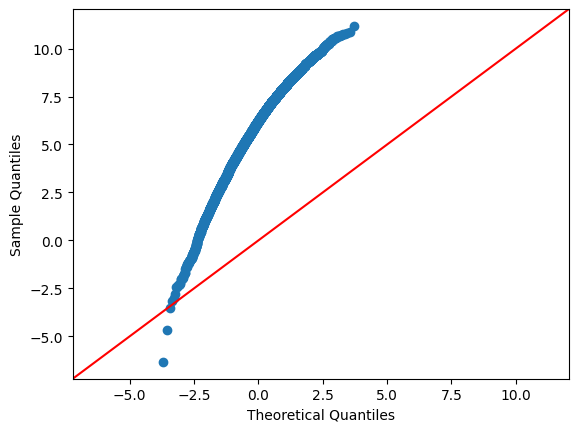

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(df["Moderate Negative Skew"],line = '45')
plt.show()


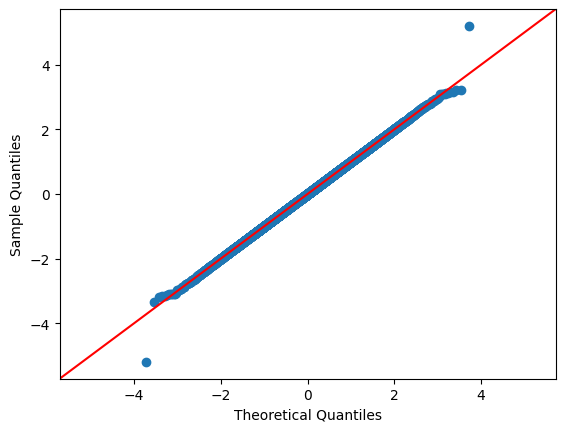

In [41]:
sm.qqplot(df["Moderate Negative Skew_1"],line = '45')
plt.show()

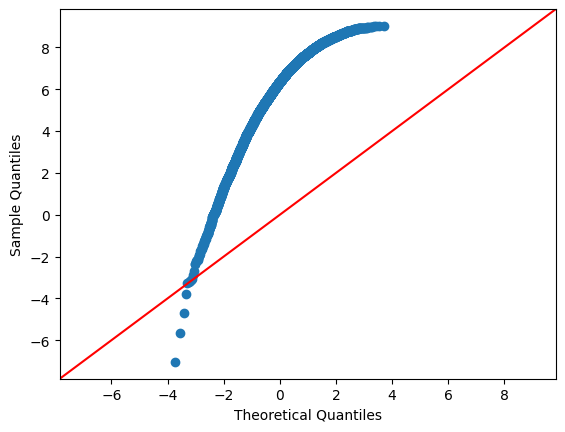

In [43]:
df["Highly Negative Skew_1"] = qt.fit_transform(df[["Highly Negative Skew"]])
sm.qqplot(df["Highly Negative Skew"],line = '45')
plt.show()

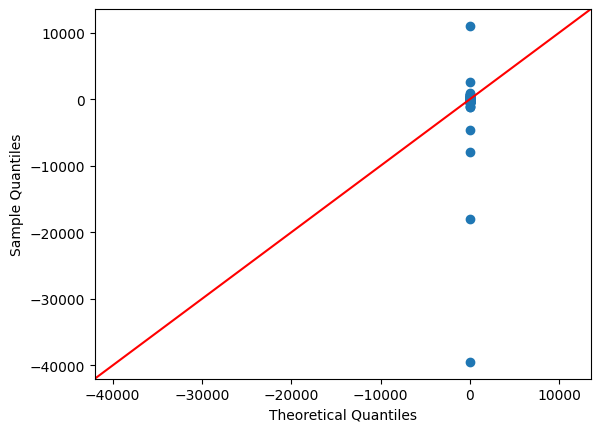

In [44]:
sm.qqplot(np.reciprocal(df["Moderate Negative Skew_1"]),line = '45')
plt.show()

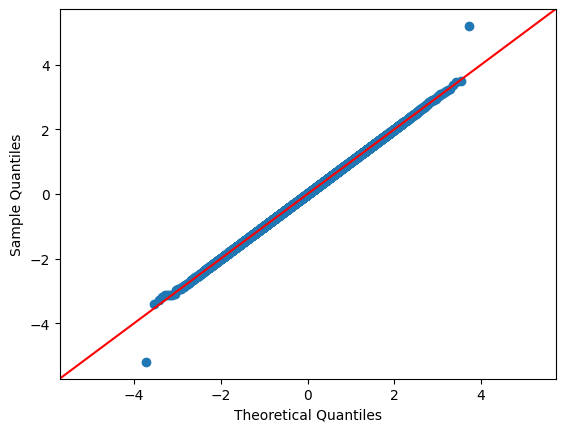

In [45]:
sm.qqplot(df["Highly Negative Skew_1"],line = '45')
plt.show()

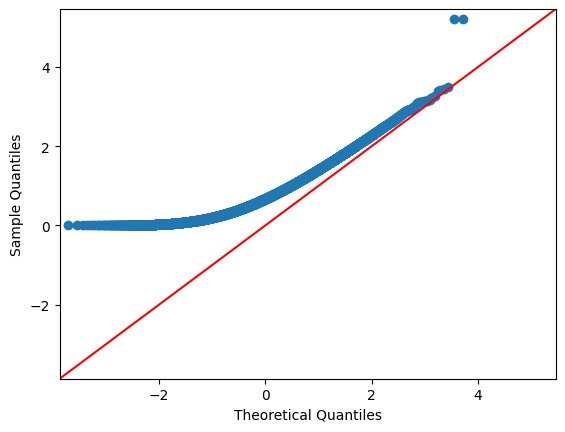

In [46]:
sm.qqplot(np.abs(df["Highly Negative Skew_1"]),line = '45')
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


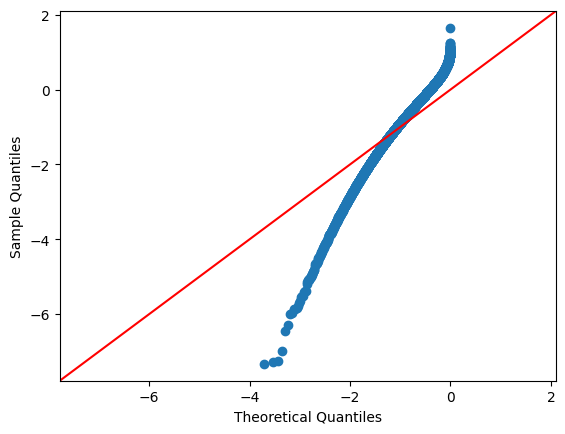

In [47]:
sm.qqplot(np.log(df["Highly Negative Skew_1"]),line = '45')
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


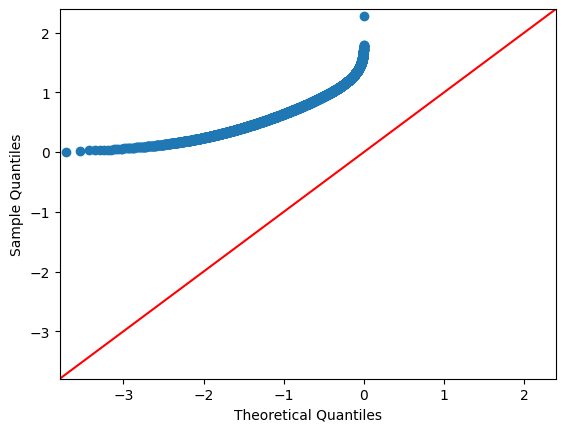

In [48]:
sm.qqplot(np.sqrt(df["Moderate Negative Skew_1"]),line='45')
plt.show()

In [49]:
pd.concat([CC,new],axis = 1)

,id,bin_1,bin_2,Ord_1,Ord_2,Target,City,City
0,0,F,N,Hot,High School,0,0.445272,0.445272
1,1,F,Y,Warm,Masters,1,0.565054,0.565054
2,2,M,N,Very Hot,Diploma,1,0.565054,0.565054
3,3,M,Y,Cold,Bachelors,0,0.525744,0.525744
4,4,M,Y,Cold,Bachelors,1,0.445272,0.445272
5,5,F,N,Very Hot,Masters,0,0.445272,0.445272
6,6,M,N,Warm,PhD,1,0.525744,0.525744
7,7,F,N,Hot,High School,1,0.525744,0.525744
8,8,M,N,Very Hot,High School,0,0.445272,0.445272
9,9,F,Y,Warm,PhD,0,0.445272,0.445272
